In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import scipy.sparse as sp

from DataParser import DataParser
from CFItemKNN import CFItemKNN
import SimpleEvaluator as evaluator

from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

In [2]:
parser = DataParser()

In [3]:
URM_all = parser.get_URM_all()
URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage=0.85)
URM_train, URM_valid = split_train_in_two_percentage_global_sample(URM_train, train_percentage=0.85)

In [4]:
MAP_per_k = []

In [8]:
x_tick = [10, 50, 100, 500, 900, 1000]
recommender = CFItemKNN(URM_train)
for topK in x_tick_n:
    recommender.fit(shrink=10, topK=topK)
    result_dict= evaluator.evaluator(recommender,URM_valid, cutoff=10)
    MAP_per_k.append(result_dict["MAP"])
    x_tick.append(topK)

Similarity column 25975 ( 100 % ), 1596.32 column/sec, elapsed time 0.27 min


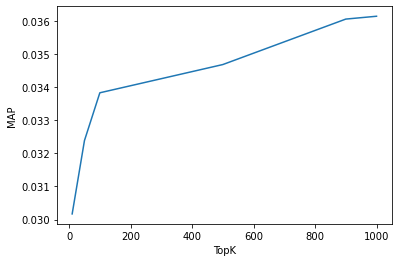

In [9]:
plt.plot(x_tick, MAP_per_k)
plt.ylabel('MAP')
plt.xlabel('TopK')
plt.show()

In [11]:
x_tick = [0, 10, 30, 50, 100]
MAP_per_shrinkage = []

recommender = CFItemKNN(URM_train)

for shrink in x_tick:
    
    recommender.fit(shrink=shrink, topK=900)
    result_dict= evaluator.evaluator(recommender,URM_valid, cutoff=10)    
    MAP_per_shrinkage.append(result_dict["MAP"])

Similarity column 25975 ( 100 % ), 1527.59 column/sec, elapsed time 0.28 min
Similarity column 25975 ( 100 % ), 1630.99 column/sec, elapsed time 0.27 min
Similarity column 25975 ( 100 % ), 1629.10 column/sec, elapsed time 0.27 min
Similarity column 25975 ( 100 % ), 1417.54 column/sec, elapsed time 0.31 min
Similarity column 25975 ( 100 % ), 1578.21 column/sec, elapsed time 0.27 min


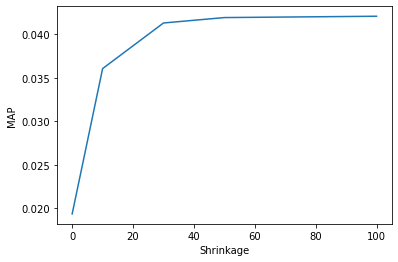

In [12]:
plt.plot(x_tick, MAP_per_shrinkage)
plt.ylabel('MAP')
plt.xlabel('Shrinkage')
plt.show()

In [13]:
rec2 = CFItemKNN(URM_train)
rec2.fit(shrink=356, topK=967)
res_dict = evaluator.evaluator(rec2, URM_valid, cutoff=10)

Similarity column 25975 ( 100 % ), 1934.13 column/sec, elapsed time 0.22 min


In [14]:
res_dict

{'precision': 0.021224043715846845,
 'recall': 0.08833301334269418,
 'MAP': 0.04128631164062464}

### Predictions

In [ ]:
final_recommender = TopPopRecommender(URM_all) 
final_recommender.fit()

In [ ]:
import re

In [ ]:
out_userid = np.array([])
out_itemlist = np.array([])

target_data = parser.get_target_data()
for user_id in target_data.user_id.unique():
    out_userid = np.append(out_userid, user_id)
    out_itemlist = np.append(out_itemlist, 
                             re.sub(' +', ' ', np.array_str(final_recommender.recommend(user_id,at=10))[1:-1]))

out_dataframe = pd.DataFrame(data={'user_id':out_userid, 'item_list':out_itemlist})
out_dataframe = out_dataframe.astype({'user_id': 'int32'})